# ⭐Imports

In [2]:
from processing_functions import *
%matplotlib inline

TensorFlow Version:  2.1.0


# ⭐ Build Classifier

## 🔵 Preprocess Data 

In [3]:
# MAIN
data_s = np.array(pd.read_csv('data/data_s_100k_normal').iloc[:, 1:])
data_b = np.array(pd.read_csv('data/data_b_100k_normal').iloc[:, 1:])

# # Slice & Save
# data_s = data_s[0:50000*40, 0:40]
# data_b = data_b[0:50000*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

Total Events: 200000
Total Labels: 200000

Shape:  (200000, 1600)

Train:  (139400, 1600) (139400,)
Val:  (30600, 1600) (30600,)
Test:  (30000, 1600) (30000,)
 


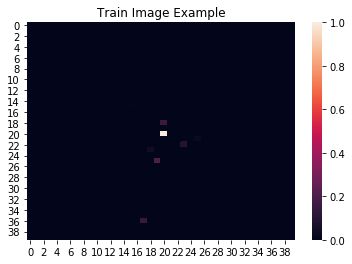

In [4]:
train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)

## 🔵 Create Models

🔴 Instantiate Models

In [5]:
import sklearn.discriminant_analysis
random.seed(42)

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
#decision_tree = DecisionTreeClassifier(random_state=42)
#naive_bayes_g = GaussianNB()
#bagging = BaggingClassifier(random_state=42, n_jobs=-1)
#SGD = sklearn.linear_model.SGDClassifier(random_state=42)
#LDA = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()


models = [naive_bayes, random_forest, svm, adaboost, KNN, BDT]

In [6]:
# Fit Models
for model in models:
    model.fit(train_examples, train_labels)

## 🔵 Model Performance (quick)

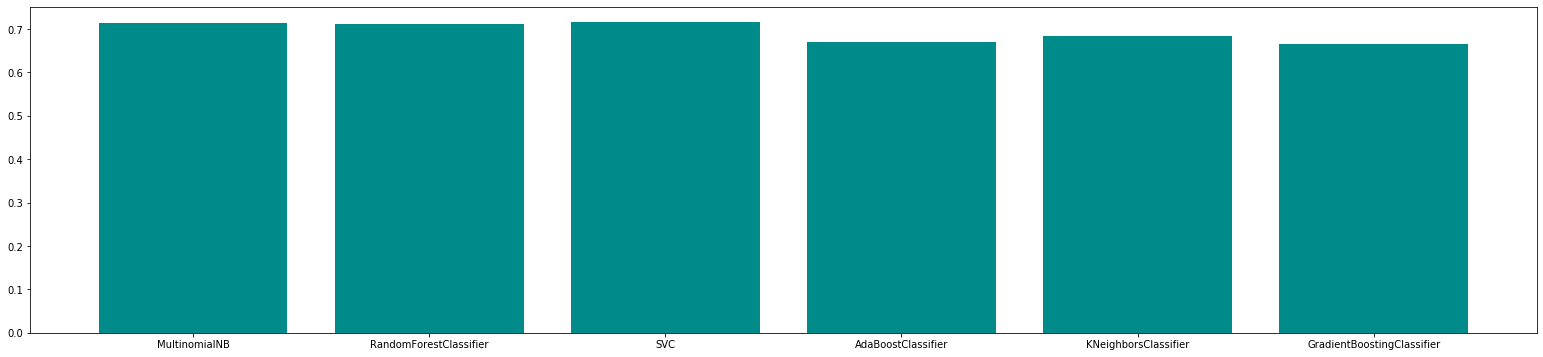

Performance
0.72 SVC
0.71 MultinomialNB
0.71 RandomForestClassifier
0.68 KNeighborsClassifier
0.67 AdaBoostClassifier
0.67 GradientBoostingClassifier


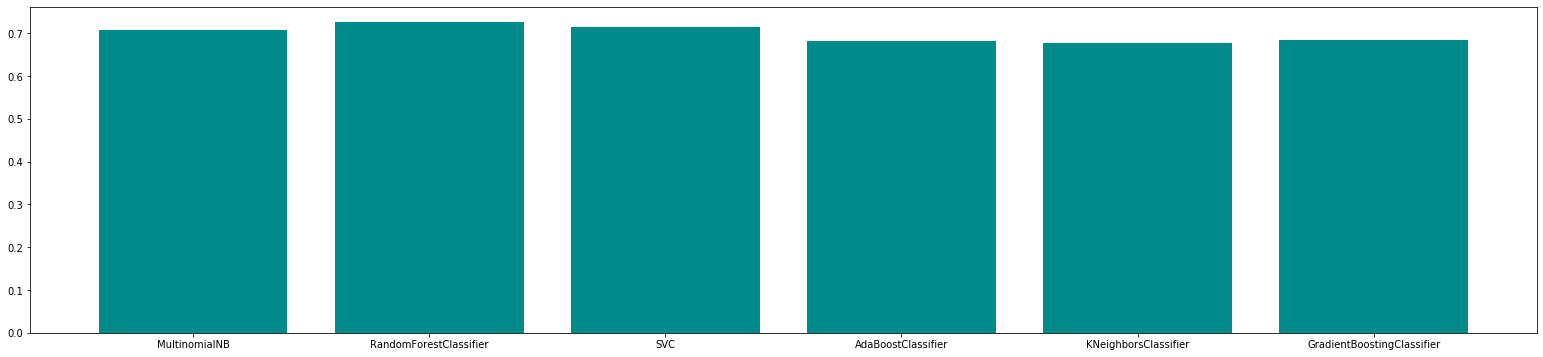

Performance
0.73 RandomForestClassifier
0.71 SVC
0.71 MultinomialNB
0.68 GradientBoostingClassifier
0.68 AdaBoostClassifier
0.68 KNeighborsClassifier


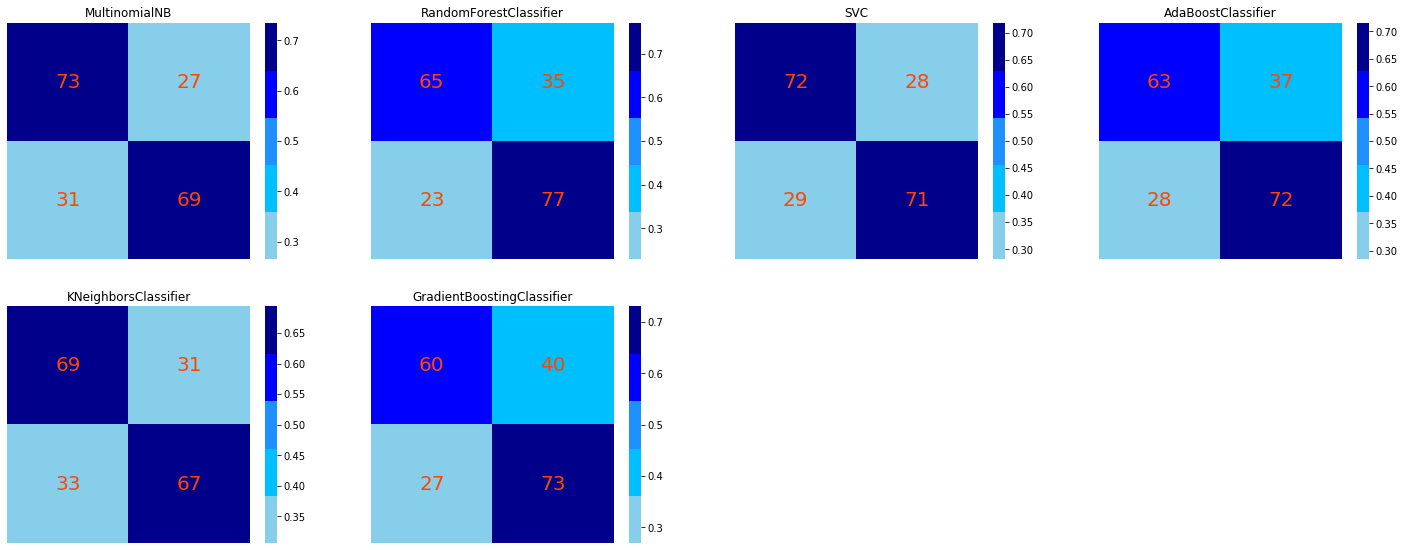

In [7]:
# Compare f1 score
compare_accuracy(models, test_examples, test_labels)
compare_f1(models, test_examples, test_labels)

cmx_sklearn(models, test_examples, test_labels, dim=4)

# 1000

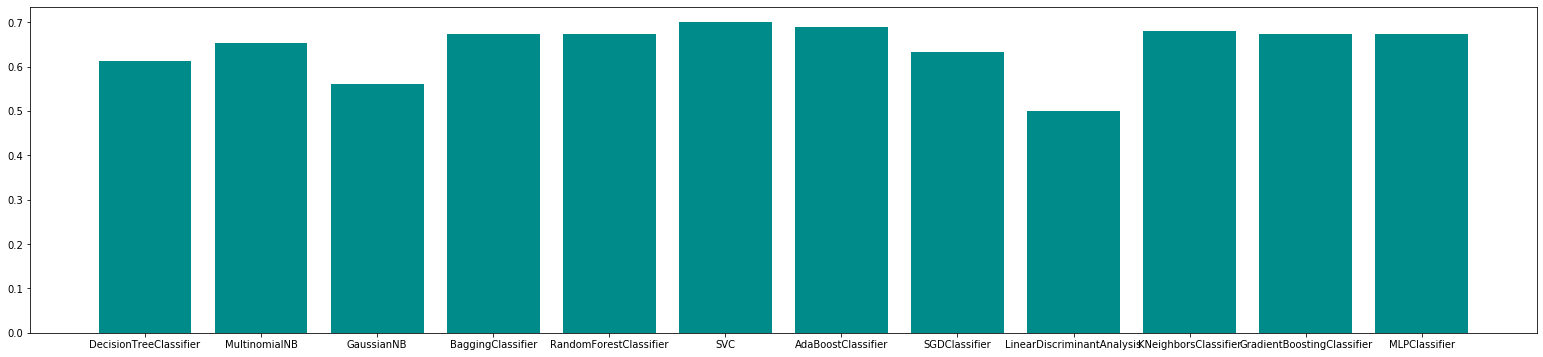

Performance
0.70 SVC
0.69 AdaBoostClassifier
0.68 KNeighborsClassifier
0.67 MLPClassifier
0.67 GradientBoostingClassifier
0.67 RandomForestClassifier
0.67 BaggingClassifier
0.65 MultinomialNB
0.63 SGDClassifier
0.61 DecisionTreeClassifier
0.56 GaussianNB
0.50 LinearDiscriminantAnalysis


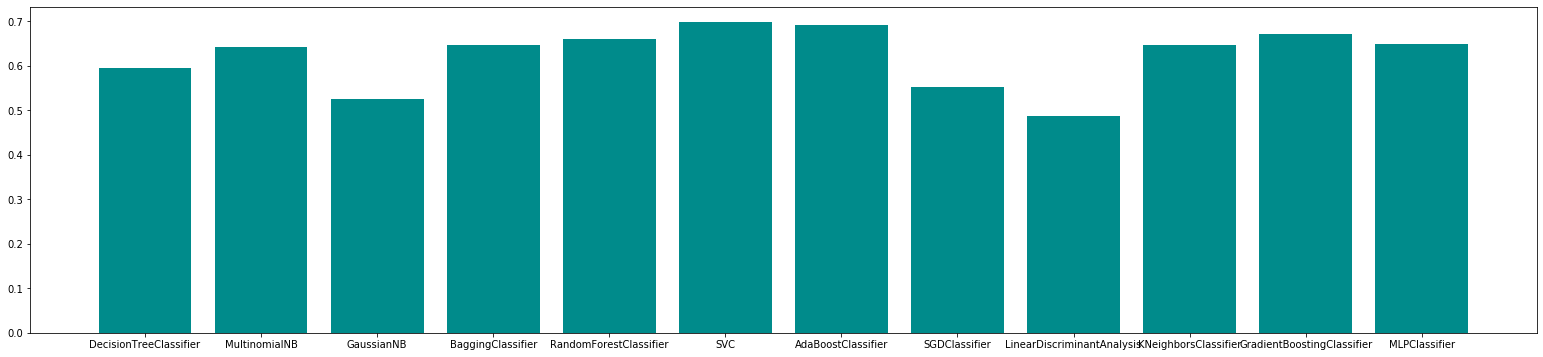

Performance
0.70 SVC
0.69 AdaBoostClassifier
0.67 GradientBoostingClassifier
0.66 RandomForestClassifier
0.65 MLPClassifier
0.65 BaggingClassifier
0.65 KNeighborsClassifier
0.64 MultinomialNB
0.59 DecisionTreeClassifier
0.55 SGDClassifier
0.53 GaussianNB
0.49 LinearDiscriminantAnalysis


In [14]:
# Compare f1 score
compare_accuracy(models, test_examples, test_labels)
compare_f1(models, test_examples, test_labels)

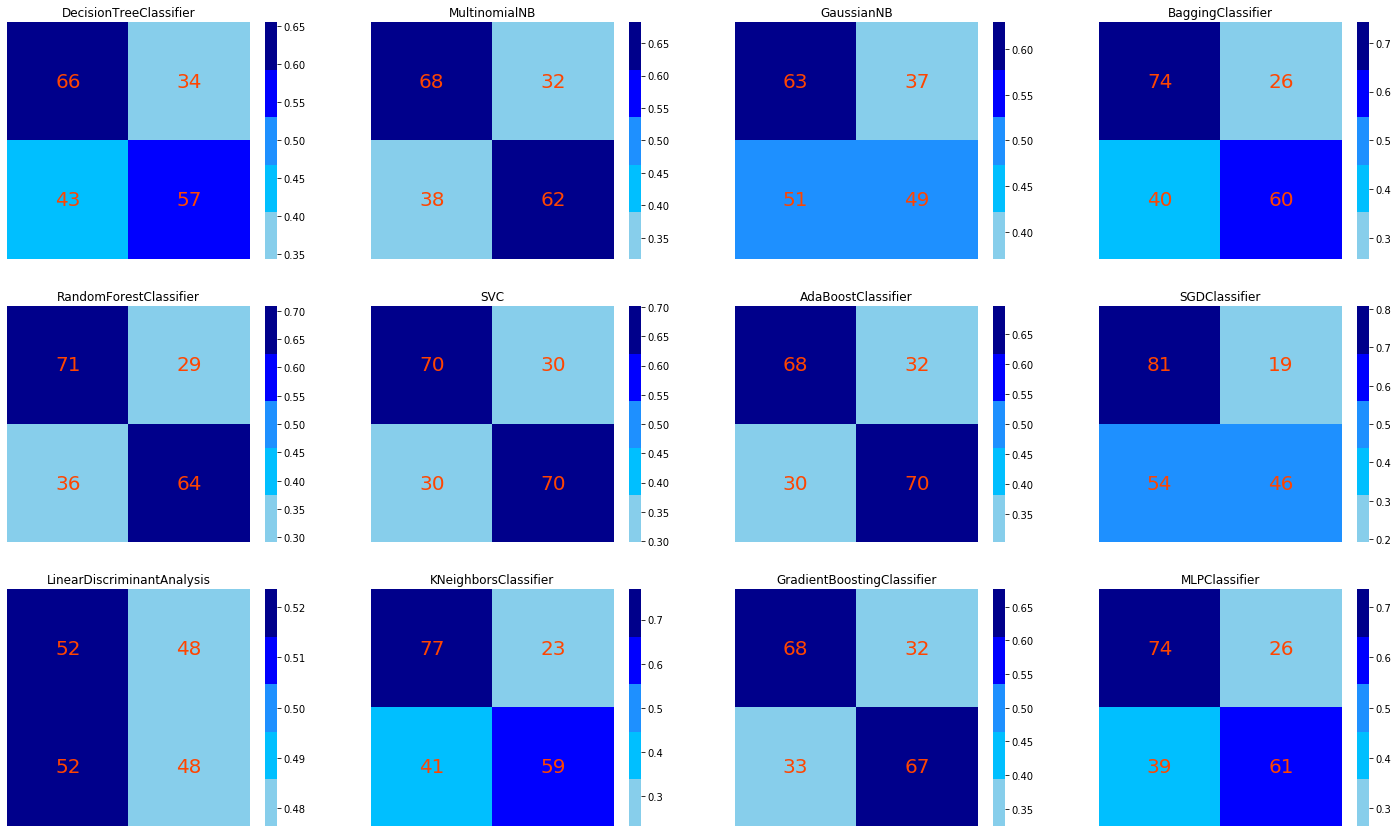

In [18]:
cmx_sklearn(models, test_examples, test_labels, dim=4)

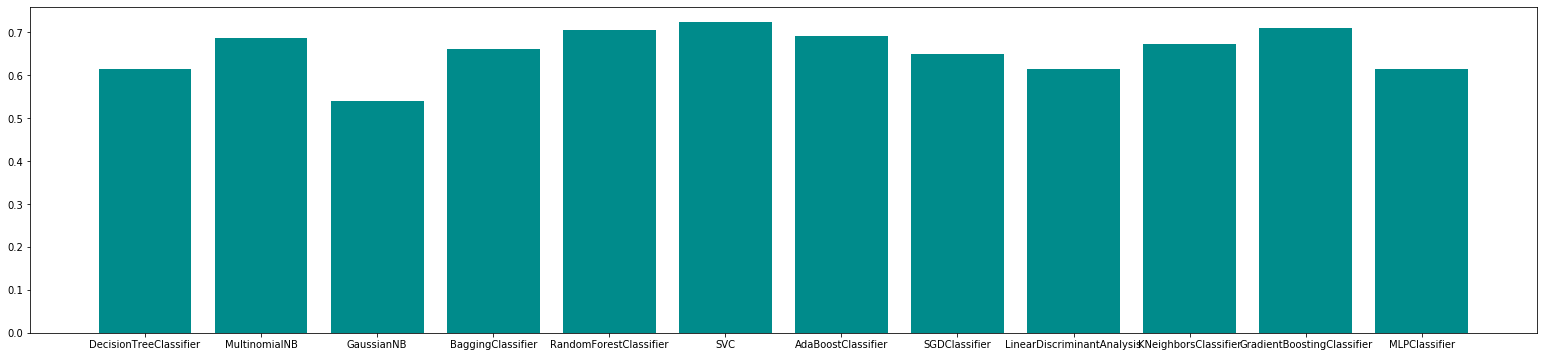

Performance
0.72 SVC
0.71 GradientBoostingClassifier
0.70 RandomForestClassifier
0.69 AdaBoostClassifier
0.69 MultinomialNB
0.67 KNeighborsClassifier
0.66 BaggingClassifier
0.65 SGDClassifier
0.61 MLPClassifier
0.61 DecisionTreeClassifier
0.61 LinearDiscriminantAnalysis
0.54 GaussianNB


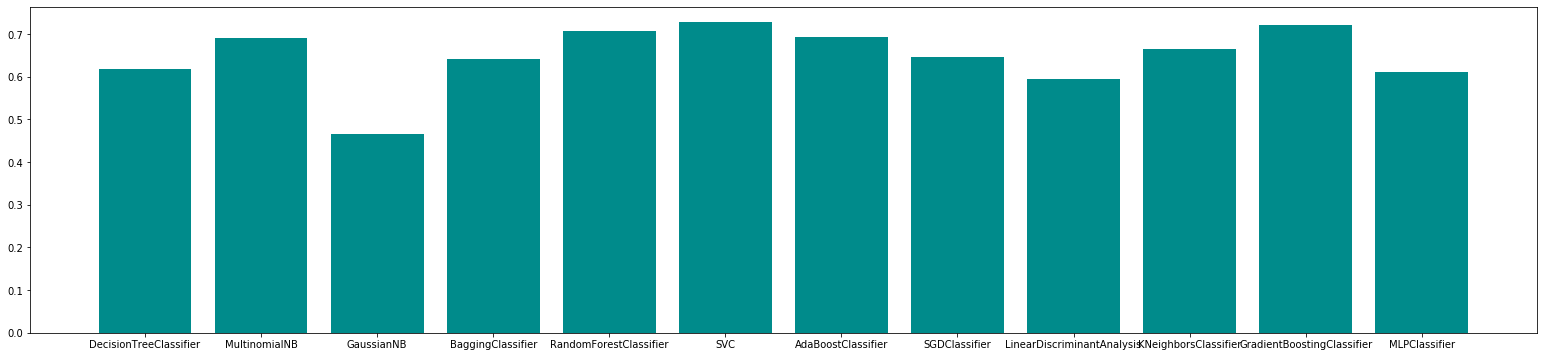

Performance
0.73 SVC
0.72 GradientBoostingClassifier
0.71 RandomForestClassifier
0.69 AdaBoostClassifier
0.69 MultinomialNB
0.66 KNeighborsClassifier
0.65 SGDClassifier
0.64 BaggingClassifier
0.62 DecisionTreeClassifier
0.61 MLPClassifier
0.60 LinearDiscriminantAnalysis
0.47 GaussianNB


In [23]:
# Compare f1 score
compare_accuracy(models, test_examples, test_labels)
compare_f1(models, test_examples, test_labels)

## 🔵 (Prep) Hyperparameter Tuning (Hardcore)

In [ ]:
# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [10, 20, 30, 50, 100, 200, 300]
max_samples_bagging = [0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
max_features_bagging = [0.5, 1.0, 2.0, 3.0, 50.0, 200]

# Random Forests
criterion = ['gini', 'entropy']
n_estimators_rf = [100, 150, 200]
max_depth_rf = [None, 1, 3, 5, 10]
min_samples_leaf_rf = [5, 10]
min_samples_split_rf = [5, 10]


# SVC
kernel = ['rbf']
c_parameter = [0.0001, 0.001, 0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [10, 30, 50, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]


# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
naive_bayes_g_parameters = {'var_smoothing': np.logspace(0,-9, num=1000)}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (naive_bayes_g, naive_bayes_g_parameters), 
             (bagging, bagging_parameters), 
             (random_forest, random_forest_parameters), 
             (svm, svm_parameters), 
             (adaboost, adaboost_parameters)]

## 🔵 (Prep) Hyperparameter Tuning (Softcore)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time


# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [300, 1]
max_samples_bagging = [1.0]
max_features_bagging = [0.5]

# Random Forests
criterion = ['gini']
n_estimators_rf = [150, 1]
max_depth_rf = [None]
min_samples_leaf_rf = [5]
min_samples_split_rf = [5]

# SVC
kernel = ['rbf']
c_parameter = [0.1, 1]
gamma = [0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [500]
learning_rate = [0.5]







# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(f1_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (svm, svm_parameters),  
             (random_forest, random_forest_parameters), 
             (adaboost, adaboost_parameters)]

## 🔵 Hyperparameter Tuning

In [9]:
# Create list to store models
models = []
unopt_f1 = []
f1 = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-f1-training: {:.4f}".format(f1_score(train_labels, predictions_train)))
    print("Optimised-f1-training: {:.4f}".format(f1_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-f1-validation: {:.4f}".format(f1_score(val_labels, predictions)))
    print("Optimised-f1-validation: {:.4f}".format(f1_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_f1.append(accuracy_score(val_labels, predictions))
    f1.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised f1 (validation): {}'.format(unopt_f1))
print('Best unoptimised f1 (validation): {}\n'.format(max(unopt_f1)))
print('All optimised f1 (validation): {}'.format(f1))
print('Best optimised f1 (validation): {}'.format(max(f1)))


MultinomialNB



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-650e84eaa976>", line 13, in <module>
    start = time.time()
AttributeError: 'builtin_function_or_method' object has no attribute 'time'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\john

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

## 🔵 Model Performance

In [ ]:
# Compare f1 score
compare_f1(models, test_examples, test_labels)

In [ ]:
# Plot Confusion Matrices
cmx_sklearn(models, test_examples, test_labels)

## 🔵 Bagging RF

In [ ]:
model_bagg = models[2]
model_rf = models[3]


bagg_param_final = {'base_estimator': [model_rf], 'n_estimators': [300, 500], 'max_features': [0.2, 0.3, 0.5, 0.7], 'max_samples': [1.0]}


print('\n{}\n'.format(clf.__class__.__name__))

grid_obj = GridSearchCV(model_bagg, bagg_param_final, scoring=scorer, n_jobs = 6, verbose = 5)


# Perform grid search
start = time.time()
grid_fit = grid_obj.fit(train_examples, train_labels)
end = time.time()
print('Time to tune: {}s\n'.format(round(end - start), 2))

# Get best estimator
best_clf = grid_fit.best_estimator_
models.append(best_clf)

# Make predictions using the unoptimized and model
predictions = (model_bagg.fit(train_examples, train_labels)).predict(val_examples)
best_predictions = best_clf.predict(val_examples)

predictions_train = (model_bagg.fit(train_examples, train_labels)).predict(train_examples)
best_predictions_train = best_clf.predict(train_examples)

# Check hyperparameters
print('Unoptomised: {}\n'.format(model_bagg.get_params(deep = True)))
print('Optomised: {}\n'.format(best_clf.get_params(deep = True)))

# Print Results
print("\nUnoptimised-Accuracy-Training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
print("Optimised-Accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))

print("\nUnoptimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
print("Optimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))

print('\n \n \n=============================================================================================')

unopt_f1.append(accuracy_score(val_labels, predictions))
f1.append(accuracy_score(val_labels, best_predictions))